In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Solving a system of linear equations

$$\mathbf{A}\mathbf{x} = \mathbf{b}$$



# Iterative Method


The Jacobi method is an iterative algorithm used to solve a system of linear equations. Unlike the Gauss-Seidel method, the Jacobi method updates all the variables simultaneously at each iteration using the values from the previous iteration.


## Algorithm

Given a system of linear equations $Ax = b$, the Jacobi method updates the solution vector $x$ as follows:


$ x_{i,n} = \frac{1}{a_{ii}} \left( b_i - \sum_{j=1, j \neq i}^{k} a_{ij} x_{j,n-1} \right) $


where:

- $n$ is the iteration number,

- $k$ is the number of equations and unknowns,

- $a_{ij}$ are the elements of the matrix $A$, $i$-th row and $j$-th column

- $b_i$ are the elements of the vector $b$,

- $x_{i,n}$ is the updated value of $x_i$,

- $x_{j,n-1}$ is the value of $x_j$ from the previous iteration.


The vector $\mathbf{x}$ converges if the system of equations are diagonally dominant

## Diagonal Dominance

Diagonal dominance is a property of matrices that plays a crucial role in the convergence of iterative methods for solving systems of linear equations, such as the Jacobi and Gauss-Seidel methods.


A matrix $A = [a_{ij}]$ is said to be **diagonally dominant** if, for every row $i$, the magnitude of the diagonal element is greater than or equal to the sum of the magnitudes of all the other (non-diagonal) elements in that row. Mathematically, this is expressed as:


$ |a_{ii}| \geq \sum_{\substack{j=1 \\ j \neq i}}^n |a_{ij}| \quad \text{for all } i $


If the inequality is strict (i.e., $ |a_{ii}| > \sum_{\substack{j=1 \\ j \neq i}}^n |a_{ij}| $), then the matrix is said to be **strictly diagonally dominant**.


Reference: 

https://en.wikipedia.org/wiki/Jacobi_method








## Example:

$$4x_1 + x_2 + 2x_3 = 4 $$

$$3x_1 + 5x_2 + 1x_3 = 7 $$

$$x_1 + x_2 + 3x_3 = 3$$

The above system of equations are diagonally dominant. So we can solve them using iterative methods.

Let $\mathbf{x}_{n} = \begin{bmatrix}x_{1,n} \\ x_{2,n} \\x_{3,n}\end{bmatrix}$ and $\mathbf{x}_{n-1} = \begin{bmatrix}x_{1,n-1} \\ x_{2,n-1} \\x_{3,n-1}\end{bmatrix}$, where $n$ indicates the iteration. 

The above system of equations can be written iteratively as shown below:

$$x_{1, n} = \frac{1}{4} (4 - x_{2, n-1} - 2 x_{3, n-1})$$

$$x_{2, n} = \frac{1}{5} (7 - 3x_{1, n-1} - x_{3, n-1})$$

$$x_{3, n} = \frac{1}{3} (3 - x_{1, n-1} - x_{2, n-1})$$


The algorithm starts with $\mathbf{x}_{0} = \begin{bmatrix} 0 \\ 0 \\ 0\end{bmatrix}$. Then it calculates $\mathbf{x}_1$ by substituting $\mathbf{x}_{0}$ in the above equation. It is called one iteration. Repeat these iterations till the differences in $|x_{k,j}-x_{k,j-1}| < tol$ for a given error tolerance ($tol$). More details along with the examples can be found in the reference.


In [ ]:
# Example 
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]], dtype=float)
b = np.array([4, 7, 3], dtype=float)

# Jacobi method or iterative solver to solve system of linear equations

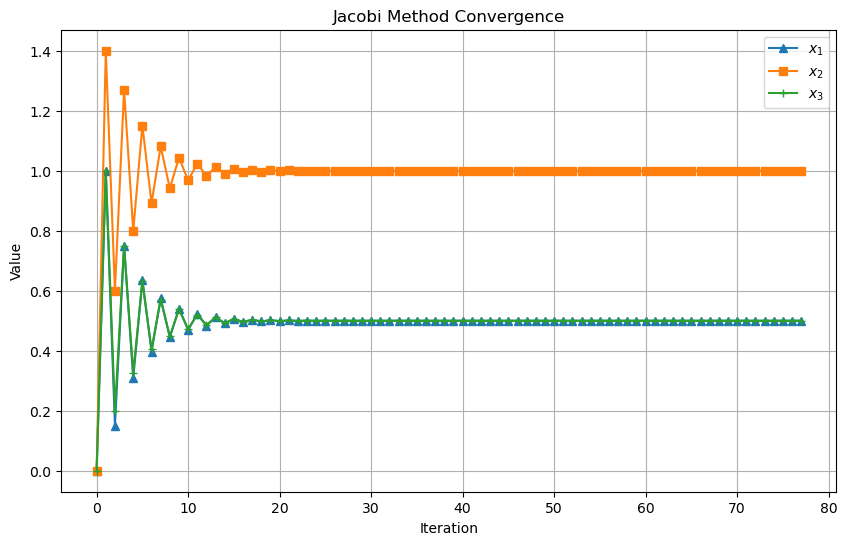

Trace of values: 
[[0.         0.         0.        ]
 [1.         1.4        1.        ]
 [0.15       0.6        0.2       ]
 [0.75       1.27       0.75      ]
 [0.3075     0.8        0.32666667]
 [0.63666667 1.15016667 0.63083333]
 [0.39704167 0.89183333 0.40438889]
 [0.57484722 1.08089722 0.570375  ]
 [0.44458819 0.94101667 0.44808519]
 [0.54070324 1.04363005 0.53813171]
 [0.47002663 0.96795171 0.4718889 ]
 [0.52206762 1.02360624 0.52067389]
 [0.4837615  0.98262465 0.48477538]
 [0.51195615 1.01278803 0.51120462]
 [0.49120069 0.99058539 0.49175194]
 [0.50647768 1.0069292  0.50607131]
 [0.49523205 0.99489913 0.49553104]
 [0.5035097  1.00375456 0.50328961]
 [0.49741655 0.99723626 0.49757858]
 [0.50190165 1.00203435 0.5017824 ]
 [0.49860021 0.99850253 0.498688  ]
 [0.50103037 1.00110227 0.50096575]
 [0.49924156 0.99918863 0.49928912]
 [0.50055828 1.00059724 0.50052327]
 [0.49958905 0.99956038 0.49961483]
 [0.50030249 1.0003236  0.50028352]
 [0.49977734 0.9997618  0.4997913 ]
 [0.500163

In [14]:
# Jacobi method
def iterativeSolver(A, b, tol=1e-10):
    n = len(b)    
    x = np.zeros_like(b)  # x= x_{kj} 
    convergence_history = []
    convergence_history.append(x.copy())
    while True:
        x_old = x.copy()   #x_old = x_{k(j-1)}  - values from the previous iteration
        for i in range(n):
            sum = 0
            for j in range(n):
                if i != j:
                    sum += A[i, j] * x_old[j]
            x[i] = (b[i] - sum) / A[i, i]  # updated value in the current iteration
        
        convergence_history.append(x.copy())

        # checking for convergence
        if np.linalg.norm(x - x_old, ord=np.inf) < tol:
            break  
            
    return x, convergence_history

# Example usage
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]], dtype=float)
b = np.array([4, 7, 3], dtype=float)
x_init = np.zeros_like(b)

solution, convergence_history = iterativeSolver(A, b)

# Visualization
convergence_history = np.array(convergence_history)
iterations = np.arange(convergence_history.shape[0])
markers = ['^', 's', '+', '^', 'v', '<', '>', 'p', '*', 'h']
plt.figure(figsize=(10, 6))
for i in range(convergence_history.shape[1]):
    plt.plot(iterations, convergence_history[:, i], label=f'$x_{i+1}$', marker=markers[i % len(markers)])
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Jacobi Method Convergence')
plt.legend()
plt.grid(True)
plt.show()


print(f'Trace of values: \n{convergence_history}')

print("Solution:", solution)

# Direct Method to solve system of linear equations

$$ \mathbf{x} = A^{-1} \mathbf{b}$$

In [3]:
# Using matrix inversion to solve Ax = b
x_direct = np.linalg.inv(A).dot(b)
print("Solution using matrix inversion:", x_direct)

Solution using matrix inversion: [0.5 1.  0.5]


## System of Nonlinear Equations


Example:

$$x_1 = \max(0.3x_1 + 0.5x_2 + 1, 0.2x_1 + 0.4x_2 + 0.5)$$ 

$$x_2 = \max(0.4x_1 + 0.3x_2 + 2, 0.1x_1 + 0.2x_2 + 1)$$

These are piecewise linear equations

[5.86206897 6.20689655]


<Figure size 1000x600 with 0 Axes>

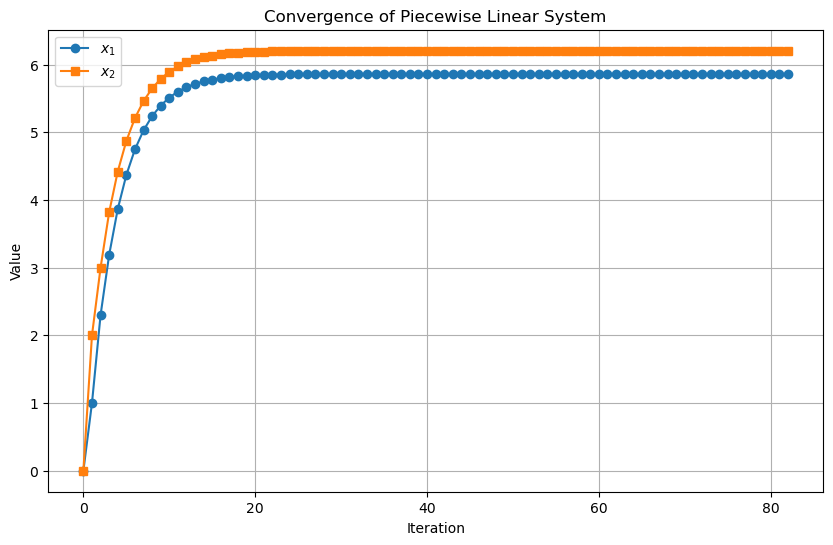

Trace of values: 
[[0.         0.        ]
 [1.         2.        ]
 [2.3        3.        ]
 [3.19       3.82      ]
 [3.867      4.422     ]
 [4.3711     4.8734    ]
 [4.74803    5.21046   ]
 [5.029639   5.46235   ]
 [5.2400667  5.6505606 ]
 [5.39730031 5.79119486]
 [5.51478752 5.89627858]
 [5.60257555 5.97479858]
 [5.66817196 6.03346979]
 [5.71718648 6.07730972]
 [5.75381081 6.11006751]
 [5.781177   6.13454458]
 [5.80162539 6.15283417]
 [5.8169047  6.16650041]
 [5.82832161 6.176712  ]
 [5.83685249 6.18434225]
 [5.84322687 6.19004367]
 [5.84798989 6.19430385]
 [5.85154889 6.19748711]
 [5.85420822 6.19986569]
 [5.85619531 6.201643  ]
 [5.85768009 6.20297102]
 [5.85878954 6.20396334]
 [5.85961853 6.20470482]
 [5.86023797 6.20525886]
 [5.86070082 6.20567285]
 [5.86104667 6.20598218]
 [5.86130509 6.20621332]
 [5.86149819 6.20638603]
 [5.86164247 6.20651509]
 [5.86175028 6.20661151]
 [5.86183084 6.20668357]
 [5.86189104 6.20673741]
 [5.86193601 6.20677764]
 [5.86196962 6.2068077 ]
 [5.861

In [13]:
tol=1e-10
x = np.zeros(2)
convergence_history = []
convergence_history.append(x.copy())
while True:
    x_old = x.copy()
    x[0] = max(0.3 * x_old[0] + 0.5 * x_old[1] + 1, 0.2 * x_old[0] + 0.4 * x_old[1] + 0.5)
    x[1] = max(0.4 * x_old[0] + 0.3 * x_old[1] + 2, 0.1 * x_old[0] + 0.2 * x_old[1] + 1)    
    convergence_history.append(x.copy())
    # Check for convergence
    if np.linalg.norm(x - x_old, ord=np.inf) < tol:
        break          

print(x)

convergence_history = np.array(convergence_history)
iterations = np.arange(convergence_history.shape[0])
plt.figure(figsize=(10, 6))

markers = ['o', 's', '+', '^', 'v', '<', '>', 'p', '*', 'h']
plt.figure(figsize=(10, 6))
for i in range(convergence_history.shape[1]):
    plt.plot(iterations, convergence_history[:, i], label=f'$x_{i+1}$', marker=markers[i % len(markers)])

#plt.plot(iterations, x_history[:, 0], label='$x_1$')
#plt.plot(iterations, x_history[:, 1], label='$x_2$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Convergence of Piecewise Linear System')
plt.legend()
plt.grid(True)
plt.show()
print(f'Trace of values: \n{convergence_history}')

print(f'Solution: {x}')